In [1]:
!pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=f24b68fe545b964beec9c543cba867b507693ec6ef5e68726dd782c4d9afbeff
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
import pyspark
import pandas as pd 
import numpy as np

In [3]:
tracks_pd = pd.read_csv('tracks.csv',engine = 'python',header=[1])
tracks_pd.head()

,Unnamed: 0,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information.1,interest,language_code,license,listens.1,lyricist,number,publisher,tags.2,title.1
0,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,...,NaN,4656.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293.0,NaN,3.0,NaN,[],Food
2,3,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,...,NaN,1470.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514.0,NaN,4.0,NaN,[],Electric Ave
3,5,0.0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4.0,1.0,<p></p>,6073.0,NaN,...,NaN,1933.0,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151.0,NaN,6.0,NaN,[],This World
4,10,0.0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4.0,6.0,NaN,47632.0,NaN,...,NaN,54881.0,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135.0,NaN,1.0,NaN,[],Freeway


In [4]:
tracks_pd.columns.values
tracks_pd = tracks_pd.rename(columns = {'Unnamed: 0':'track_id'})
tracks_subset = tracks_pd[['track_id','subset']]
tracks_small = tracks_subset[tracks_subset['subset'] == 'small']

In [5]:
tracks_subset

,track_id,subset
0,track_id,NaN
1,2,small
2,3,medium
3,5,small
4,10,small
...,...,...
106570,155316,large
106571,155317,large
106572,155318,large
106573,155319,large


In [6]:
tracks_small = tracks_small.drop('subset',axis = 1)
tracks_small = tracks_small.reset_index(drop = True) # This dataframe returns only small subset indices


In [7]:
tracks_small_list = [] # This list is going to be used as a filter list
for i in tracks_small['track_id']:
  tracks_small_list.append(int(i)) 
print(tracks_small_list)

[2, 5, 10, 140, 141, 148, 182, 190, 193, 194, 197, 200, 203, 204, 207, 210, 211, 212, 213, 255, 256, 368, 424, 459, 534, 540, 546, 574, 602, 615, 620, 621, 625, 666, 667, 676, 690, 694, 695, 704, 705, 706, 707, 708, 709, 714, 715, 716, 718, 777, 814, 821, 822, 825, 853, 890, 892, 897, 993, 995, 997, 998, 1039, 1040, 1066, 1069, 1073, 1075, 1082, 1083, 1087, 1102, 1193, 1195, 1196, 1197, 1249, 1259, 1270, 1276, 1277, 1278, 1417, 1427, 1443, 1482, 1510, 1544, 1642, 1644, 1649, 1661, 1663, 1666, 1673, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1701, 1702, 1703, 1704, 1706, 1720, 1732, 1733, 1735, 1736, 1883, 1891, 1893, 1924, 1925, 1929, 1930, 2012, 2096, 2097, 2099, 3263, 3264, 3265, 3266, 3270, 3271, 3272, 3273, 3274, 3492, 3532, 3533, 3534, 3535, 3537, 3538, 3573, 3598, 3624, 3707, 3708, 3720, 3721, 3722, 3724, 3725, 3761, 3762, 3763, 3765, 3766, 3775, 3776, 3777, 3778, 3779, 3832, 3833, 3840, 3880, 3895, 3896, 3904, 3905, 3906, 3908, 3909, 3910, 3911, 3912, 3913, 3920

In [8]:
features_pd = pd.read_csv("features.csv",engine = 'python',header=[3])
features_pd.head()

,track_id,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 509,Unnamed: 510,Unnamed: 511,Unnamed: 512,Unnamed: 513,Unnamed: 514,Unnamed: 515,Unnamed: 516,Unnamed: 517,Unnamed: 518
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
1,3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
4,20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993


In [9]:
filtered_features_pd = features_pd[features_pd['track_id'].isin(tracks_small_list)] # This returns only indices that match the filter list

In [10]:
filtered_features_pd.head() # Proof mission is accomplished. Now this dataset only contains data from fma_small dataset

,track_id,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 509,Unnamed: 510,Unnamed: 511,Unnamed: 512,Unnamed: 513,Unnamed: 514,Unnamed: 515,Unnamed: 516,Unnamed: 517,Unnamed: 518
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
15,140,0.533579,-0.623885,-1.086205,-1.081079,-0.765151,-0.072282,-0.882913,-0.582376,-0.884749,...,0.157683,0.028070,0.025946,11.052547,0.379395,0.052379,0.036621,0.001953,3.143968,0.057712
16,141,0.172898,-0.284804,-1.169662,-1.062855,-0.706868,-0.708281,-0.204884,0.023624,-0.642770,...,0.145994,0.024342,0.032111,32.994659,0.415527,0.040267,0.034668,0.002930,4.204097,0.028665


In [11]:
# Renaming columns name
for i, col in enumerate(filtered_features_pd.columns):
  if i==0:
    pass
  else:
    filtered_features_pd = filtered_features_pd.rename(columns={col: f"Feature {i}"})
    

In [12]:
filtered_features_pd.head()

,track_id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 509,Feature 510,Feature 511,Feature 512,Feature 513,Feature 514,Feature 515,Feature 516,Feature 517,Feature 518
0,2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
2,5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
3,10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
15,140,0.533579,-0.623885,-1.086205,-1.081079,-0.765151,-0.072282,-0.882913,-0.582376,-0.884749,...,0.157683,0.028070,0.025946,11.052547,0.379395,0.052379,0.036621,0.001953,3.143968,0.057712
16,141,0.172898,-0.284804,-1.169662,-1.062855,-0.706868,-0.708281,-0.204884,0.023624,-0.642770,...,0.145994,0.024342,0.032111,32.994659,0.415527,0.040267,0.034668,0.002930,4.204097,0.028665


In [13]:
filtered_features_pd = filtered_features_pd.set_index('track_id') # Track_id column goes to the index column

In [14]:
filtered_features_pd

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 509,Feature 510,Feature 511,Feature 512,Feature 513,Feature 514,Feature 515,Feature 516,Feature 517,Feature 518
track_id,,,,,,,,,,,,,,,,,,,,,
2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,1.982386,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
140,0.533579,-0.623885,-1.086205,-1.081079,-0.765151,-0.072282,-0.882913,-0.582376,-0.884749,-0.645214,...,0.157683,0.028070,0.025946,11.052547,0.379395,0.052379,0.036621,0.001953,3.143968,0.057712
141,0.172898,-0.284804,-1.169662,-1.062855,-0.706868,-0.708281,-0.204884,0.023624,-0.642770,-0.786291,...,0.145994,0.024342,0.032111,32.994659,0.415527,0.040267,0.034668,0.002930,4.204097,0.028665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92951,-0.836451,-1.019287,0.261892,-0.340112,0.336767,-0.645820,-0.592053,-0.384346,-0.673440,0.322965,...,0.119436,0.026018,0.024567,22.246973,0.624023,0.055319,0.034180,0.000000,4.276741,0.076423
92952,-0.606077,-1.073148,-1.185575,-1.141505,-0.523150,-1.127936,-1.076001,-1.004048,-1.188385,-0.551707,...,0.147425,0.027169,0.027342,9.605629,0.135254,0.017749,0.017090,0.001465,1.761993,0.008456
92953,-1.340845,-1.083782,-1.666551,-0.800989,-0.982315,-1.071313,-0.242432,-0.924937,-1.179684,-0.478645,...,0.174191,0.031557,0.032276,5.190286,0.121582,0.023702,0.018066,0.001465,2.081009,0.019189


In [15]:
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [16]:
scaler = StandardScaler() # Scale the data using the StandardScaler
X = filtered_features_pd.to_numpy()

X_scaled = scaler.fit_transform(X)

# distances = pdist(X_scaled) # Compute the pairwise distances between points using the Euclidean distance metric


dist_matrix = pairwise_distances(X_scaled, metric='euclidean') 

table_clusters = pd.DataFrame(columns=["Cluster", "K","Size", "Radius", "Diameter", "Density"]) # Create an empty DataFrame to store the output



In [17]:
from sklearn.cluster import AgglomerativeClustering

# Dictionary containing each average cluster distance for every k
average_distance_centroid = {}

for k in range(8, 17):

    # Perform agglomerative clustering with k clusters using the "ward" linkage method
    clustering = AgglomerativeClustering(n_clusters=k)
    clustering.fit(X_scaled)

    distance_centroid = {}

    # Calculate radius, diameter, and density for each cluster
    for i in range(k):
        indices = np.where(clustering.labels_ == i)[0] # Filters labels to a specific cluster
        n = len(indices) # n = Size = number of points within a cluster
        distances = []
        if n > 1:
           # Calculate the centroid of the cluster
            centroid = np.mean(X_scaled[indices], axis=0)

            # Distances returns the distance of each cluster point to its centroid
            distances = [np.linalg.norm(X_scaled[j] - centroid) for j in indices]
            
            # Calculate the radius as the maximum distance (from distances) between all the points in the cluster and the centroid
            radius = np.max(distances)
            
            # Calculate the diameter as the maximum pairwise distance between points in the cluster
            diameter = np.max([dist_matrix[a, b] for a in indices for b in indices])
            distance_centroid[i] = diameter            
            # Calculate the density as the number of points in the cluster (n) divided by radius squared as suggested in slides
            density = n / (radius ** 2)
            
            table_clusters = table_clusters.append({"Cluster": i, "K": k,"Size" : n,"Radius": radius, "Diameter": diameter, "Density": density}, ignore_index=True)
        else:
            table_clusters = table_clusters.append({"Cluster": i, "K": k ,"Size": 1, "Radius": 0, "Diameter": 0, "Density": 0}, ignore_index=True)
            
    average_distance_centroid[k] = np.sum(list(distance_centroid.values()))/len(distance_centroid)
# Print the output DataFrame

In [18]:
average_distance_centroid


{8: 104.25845001170434,
 9: 105.12148243913961,
 10: 102.18351312272765,
 11: 96.12220810944075,
 12: 92.37742329657567,
 13: 89.29839786235323,
 14: 86.56606186074542,
 15: 83.88729529661164,
 16: 82.22109015125578}

Text(0, 0.5, 'Average distance to centroid')

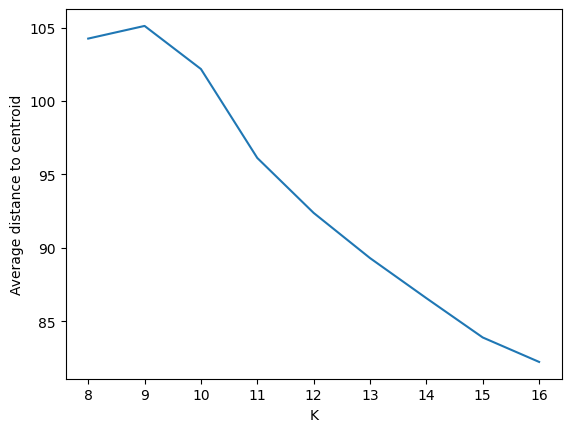

In [19]:
# Finding the optimal K
import matplotlib.pyplot as plt

y = average_distance_centroid.values()

x = average_distance_centroid.keys()

plt.plot(x,y)
plt.xlabel("K")
plt.ylabel("Average distance to centroid")


# **Exercise 1.2**

In [20]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import collect_set

sc = SparkContext(appName="exercise1")
print(sc.version)

3.4.0


In [21]:
spark = SparkSession.builder.appName("BFR").getOrCreate()
spark

In [22]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors

In [23]:
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import col

df_spark = spark.read.csv('features.csv', header=False) # assuming no header row

original_columns = df_spark.take(3)

new_columns = ['feature_' + str(i) for i in range(len(df_spark.columns))]

df_spark = df_spark.rdd.zipWithIndex() \
               .filter(lambda x: x[1] >= 4) \
               .map(lambda x: x[0]) \
               .toDF(new_columns)

# loop through columns and cast to float
for col_name in df_spark.columns:
    df_spark = df_spark.withColumn(col_name, col(col_name).cast("float")) # Convert string values to int values

count_df = df_spark.count()
cols = df_spark.columns # Get every column of the dataframe

In [24]:
df_spark.show()

+---------+------------+------------+-----------+------------+-----------+------------+-----------+-----------+-----------+-----------+-----------+-----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+----------+----------+-----------+-----------+-----------+----------+-----------+----------+-----------+----------+----------+-----------+------------+------------+-----------+-----------+------------+-----------+------------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------

Parameters


In [25]:
# The number k is achieved by applying the Elbow Method to the plot seen above.
k = 15

# Size of the sample used for initialization. This number was based on the number of examples for the small dataset for the previous exercise.
sample_size = 2123

# We assume the clusters are normally distributed in d dimensions, therefore, one std = sqrt(d), where d is the dimension of a dataset, aka number of features of a dataset.
# We can also define the threshold_distance as, for example, 4 * std = 4*sqrt(d). The larger the threshold_distance, the larger the cluster will be.
# For this dataset, we have 518 features.

threshold_distance = 4*np.sqrt(518) 

# Setting a maximum number of iterations prevents the algorithm being stucked infinelty in a loop or failing to converge.
max_iterations = 100


**Initialization**

In [26]:
# Select the initial k centroids as k random points
centroids = df_spark.sample(False,fraction = k/count_df, seed = 42)
centroids.count()

10

In [27]:
centroids.show()

+---------+----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+-----------+-----------+------------+-----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+----------+-----------+----------+----------+----------+-----------+-----------+-----------+----------+----------+-----------+-----------+-----------+-----------+------------+----------+----------+-----------+-----------+-----------+----------+-----------+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+----------+-----------+------------+-----------+-----------+----------+-----------+------------+----------+-----------+------------+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----------

BFR Functions

In [28]:
from scipy.spatial.distance import mahalanobis

def mahalanobis_distance(row, centroids):
  # Convert each element in the numpy array to float
  row_array = np.array(row)
  # row_no_id = row_array[1:] 
 
  # Leaving id column behind to compute the Covariance Matrix of centroids 
  centroids_no_id = []
  for c in range(0,len(centroids)):
    centroids_no_id.append(np.array(centroids_mat[c][1:]))
  
  # Compute the covariance matrix of the data
  cov_matrix = np.cov(np.array(centroids_no_id).T)

  # Compute the inverse of the covariance matrix
  inv_cov_matrix = np.linalg.pinv(cov_matrix)

  # Compute the Mahalanobis distance between the row and each point in k
  distances = []
  for cluster in centroids_no_id:
    distance = mahalanobis(row_array, cluster, inv_cov_matrix)
    distances.append(distance)

  # Convert the list of distances to a numpy array
  distances = np.array(distances)

  # Return the distances array with values greater than the threshold, else return an array of zeros
  return distances


In [29]:

def squared_sum(row):
    """
    Given a PySpark DataFrame row, this function computes the squared sum of all its components.
    """
    return sum([x**2 for x in row])
    

In [50]:
def assign_points(point,cluster,DS):
    """
    Assigns a point to DS
    """ 
    cluster = int(cluster)
    point_array = np.array(point)

    DS[cluster]["Id"] = DS[cluster]["Id"]
    DS[cluster]["N"] = DS[cluster]["N"] + 1
    DS[cluster]["SUM"] = DS[cluster]["SUM"] + sum(point)
    DS[cluster]["SUMSQ"] = DS[cluster]["SUMSQ"]+ squared_sum(point)
    DS[cluster]["Mean"] = DS[cluster]["SUM"]/ DS[cluster]["N"]

    return DS[cluster]


In [31]:
def find_closest_cluster(point, clusters):
    """
    Find the closest cluster to a given point

    """
    point_array = np.array(point)
    closest_cluster = None
    closest_distance = float('inf')
    cluster_i = -1
    for cluster in clusters:
        cluster_i = cluster_i + 1
        distance = np.sum(np.square(point_array - np.array(cluster[1:])))
        if distance < closest_distance:
            closest_distance = distance
            closest_cluster = cluster[0]
    return closest_cluster, cluster_i

In [32]:
def merge_cluster(c1, c2):
    """ 
    Merge two clusters and its statistics
    
    """
    id = CS_i[c1][0]
    N = CS_i[c1][1] + CS_i[c2][1]
    SUM = CS_i[c1][2] + CS_i[c2][2]
    SUMSQ = CS_i[c1][3] + CS_i[c2][3]
    Mean = CS_i[c1][4]/N

    summary_cluster = {"Id": id ,"N": N ,"SUM": SUM,"SUMSQ": SUMSQ,"Mean": Mean}
    return summary_cluster 

In [33]:
def variance_cluster(merged_cluster):
    """
    Returns the statistics of a cluster
    """
    id, N, SUM, SUMSQ, Mean = merged_cluster
    variance = (SUMSQ /N) - Mean
    return variance, merged_cluster

In [34]:
def cluster_merged(merged_cluster,threshold_distance):
  if variance_cluster(merged_cluster)[0] < threshold_distance:
    return [variance_cluster[1]]

In [43]:
# We begin by creating a loop to separate the main-memory-full data into chunks of data.
# Say we divide it in chunks of size = 0.05 * size_complete_dataset:
sample_size = 0.1* count_df
print(sample_size)

# Selecting approximately k points as random centroids and create empty discard sets for each cluster.
centroids = df_spark.sample(False, k/df_spark.count(), seed=42).collect()


6427.200000000001


In [51]:
centroids_mat = []
for centroid in centroids:
  float_row = [float(elem) if isinstance(elem, str) else elem for elem in centroid]
  centroids_mat.append(float_row)

DS = {}
# Initialize DS: 
DS = [{"Id":int(c[0]),"N": 0,"SUM":0,"SUMSQ":0,"Mean":0} for c in centroids_mat]
# DS = { ID, N, SUM, SUMSQ, Mean }

# Initialize the Retained Set to have the same structure as our dataframe, therefore it will be a set of data points
RS_old = spark.createDataFrame([], df_spark.schema).rdd

In [56]:
# sample = df_spark.rdd.filter(lambda row: row[0] >= 1 and row[0] < 1 + 10).collect()
DS

[{'Id': 15989, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 17827, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 25735, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 29707, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 30302, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 43881, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 45580, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 51552, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 57409, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 69004, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0}]

In [53]:
# Get the next sample of data.
sample = df_spark.rdd.filter(lambda row: row[0] >= 1 and row[0] < 1 + 10)

# Calculate the distances between each point and its nearest centroid.
# Returns only points with distance lesser than threshold
distances = sample.filter(lambda row: np.any(min([mahalanobis_distance(row[1:],centroids_mat)]) <= threshold_distance))
distances = distances.map(lambda row: (row[0], row[1:], find_closest_cluster(row[1:],centroids_mat)[1]))

Detained_Set = distances.map(lambda row: assign_points(row[1],row[2])).collect()

# Discard Set, this is where points are being assigned to clusters and summarized by some statistics
# DS = distances.map(lambda row: (row[0],assign_points(row[1],find_closest_cluster(row[1],centroids_mat)))).collect()
# DS = distances.map(lambda row: (row[0], row[1], find_closest_cluster(row[1],centroids_mat)[1])).collect()




  


In [55]:
Detained_Set

[{'Id': 69004,
  'N': 1,
  'SUM': 34312.751630133775,
  'SUMSQ': 164489963.6970562,
  'Mean': 34312.751630133775},
 {'Id': 69004,
  'N': 3,
  'SUM': 104848.4927651331,
  'SUMSQ': 515894494.2259704,
  'Mean': 34949.4975883777},
 {'Id': 69004,
  'N': 3,
  'SUM': 104848.4927651331,
  'SUMSQ': 515894494.2259704,
  'Mean': 34949.4975883777},
 {'Id': 69004,
  'N': 4,
  'SUM': 138052.3270245901,
  'SUMSQ': 687081470.85588,
  'Mean': 34513.08175614753}]

In [57]:
DS

[{'Id': 15989, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 17827, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 25735, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 29707, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 30302, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 43881, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 45580, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 51552, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 57409, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0},
 {'Id': 69004, 'N': 0, 'SUM': 0, 'SUMSQ': 0, 'Mean': 0}]

In [42]:
DS

[{'Id': 69004,
  'N': 1,
  'SUM': 34312.751630133775,
  'SUMSQ': 164489963.6970562,
  'Mean': 34312.751630133775},
 {'Id': 69004,
  'N': 2,
  'SUM': 71792.97013225505,
  'SUMSQ': 355855970.77612495,
  'Mean': 35896.48506612753},
 {'Id': 69004,
  'N': 3,
  'SUM': 104848.4927651331,
  'SUMSQ': 515894494.2259704,
  'Mean': 34949.4975883777},
 {'Id': 69004,
  'N': 4,
  'SUM': 138052.3270245901,
  'SUMSQ': 687081470.85588,
  'Mean': 34513.08175614753}]

## <u>BFR algorithm loop</u>

In [40]:
# from tqdm import tqdm

# for i in tqdm(range(0,count_df, sample_size)):
#   # Get the next sample of data.
#   sample = df_spark.rdd.filter(lambda row: row[0] >= i and row[0] < i + sample_size)


#   # Calculate the distances between each point and its nearest centroid.
#   Returns only points with distance lesser than threshold
#    distances = sample.filter(lambda row: np.any(min([mahalanobis_distance(row[1:],centroids_mat)]) <= threshold_distance))
#    distances = distances.map(lambda row: (row[0], row[1:], find_closest_cluster(row[1:],centroids_mat)[1]))

#   # Discard Set, this is where points are being assigned to clusters and summarized by some statistics
#   DS = distances.filter(lambda row:(row[0], min(mahalanobis_distance(row[1],centroids) <= threshold_distance)))\
#                   .map(lambda row: (row[0],assign_points(row[1],find_closest_cluster(row[1],centroids)[1])))
#   # The map() above picks each row, and, for each row, find its closest cluster and updates its cluster statistics


#   # Retained Set, this is where points are too far away from clusters. These will be subjected to kmeans from pyspark. 
#   RS_new = distances.filter(lambda row: (row[0],min(mahalanobis_distance(row[1],centroids) > threshold_distance)))

  

#   # Clustering the reamining points using kMeans from pyspark
#   RS_new_df = RS_new.toDF()
#   kmeans = KMeans(k)
#   model = kmeans.fit(RS_new_df)
#   centroids_kMeans = model.clusterCenters() # This returns the coordinates of kMeans centroids



#   # Compression Set, this is where points from Kmeans clusters will be summarized by some statistics.
#   CS_i = RS_new.filter(lambda row: (row[0],min(mahalanobis_distance(row[1],centroids_kMeans[1]) <= threshold_distance)))\
#        .map(lambda row: (row[0],assign_points(row[1],find_closest_cluster(row[1],centroids_kMeans[1])[1]))).collect()
#   # The map() above does basically the same thing done in DS but with points used in kMeans from RS


#   # The new RS is:
#   RS_new = RS_new.filter(lambda row:(row[0], min(mahalanobis_distance(row[1],centroids_kMeans[1]) > threshold_distance)))


#   RS_old = RS_old.union(RS_new)
#   # Submerging clusters:



  







